# Examples of inverse kinematic problems

In this notebook some examples of inverse kinematic problems will be presented. 

The aim is to find the angles between links of a robotic arm that allow the arm to reach a specified target in a 3 dimensional space.
Joints are serially interconnected and can be of different kind depending on the specified constraints.

Problems might be constrained or unconstrained:
- Unconstrained: the joints of the robotic arm are assumed to allow rotation around z and x axis without constraints on the range of angles.
- Constrained: the joints of the robotic arm are assumed to be revolute. User of the program has to provide the range of theta (rotation around z axis) for each arm, and the values od alpha angles (rotation around x) which are fixed and depend on the topology of the robotica arm.

In [1]:
import numpy as np
import ParticleSwarmOptimization as PSO
import display
import matplotlib.pyplot as plt

## Example 1

The first example is a 4 link arm with length 2,1,3,2. The target is the point (2,3,4). 

In this first approach it will be used default values for inertia weights, cognitive and social factor.

MovieWriter ffmpeg unavailable; using Pillow instead.


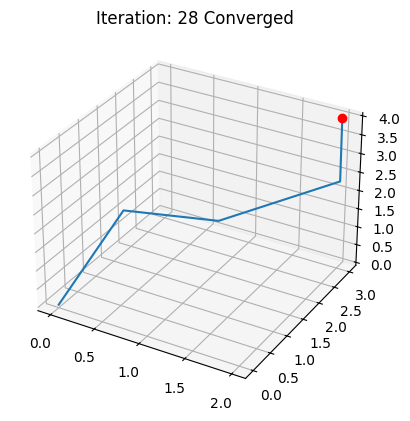

In [7]:
link=[2,1,3,2]
target=[2,3,4]
c_soc=1.49445
c_cog=1.49445
pop_size=100
max_iter=5000
w=0.5
theta,alpha,err, it, c = PSO.PSO(link, target, pop_size, max_iter, w, c_soc, c_cog)   
display.Display_animated(link,theta, alpha, target, 'unc_standard1')

## Example 2

Second example is a 7 link arm with length [0.5,0.2,0.25,0.3,0.2,0.2,0.1]. The target is the point (0.7,0.5,0.7).
As first result let's inspect the unconstrained optimization.

MovieWriter ffmpeg unavailable; using Pillow instead.


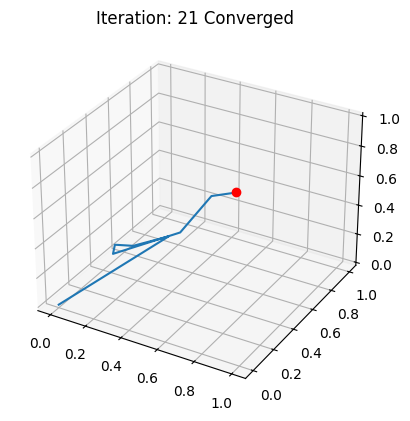

In [8]:
link=[0.5,0.2,0.25,0.3,0.2,0.2,0.1]
target=[0.7,0.5,0.7]
c_soc=1.49445
c_cog=1.49445
w=0.5
pop_size=100
max_iter=5000
theta,alpha,err, it, c = PSO.PSO(link, target, pop_size, max_iter, w, c_soc, c_cog)   
display.Display_animated(link,theta, alpha, target, 'unc_standard2')

Let's inspect now the same problem with some constraints:
- alpha values are set to be: $[- \pi /2,\pi/2,\pi/2,\pi/2,-\pi/2,0,0]$
- theta constraints: $[[-\pi,\pi],[-\pi/2,\pi/6],[-\pi/2,2*\pi/3],[-\pi,\pi],[-\pi,\pi],[-\pi,\pi],[-\pi/6,\pi/2]]$

For the first plot the boundary condition is set to absorb.

In [ ]:
link=[0.5,0.2,0.25,0.3,0.2,0.2,0.1]
target=[0.7,0.5,0.7]
c_soc=1.49445
c_cog=1.49445
w=0.5
pop_size=100
max_iter=5000
alpha_values=[-np.pi/2,np.pi/2,-np.pi/2,np.pi/2,-np.pi/2,0,0]
constraints_theta=[[-np.pi,np.pi],[-np.pi/2,np.pi/6],[-np.pi/2,2*np.pi/3],[-np.pi,np.pi],[-np.pi,np.pi],[-np.pi,np.pi],[-np.pi/6,np.pi/2]]
theta,alpha,err, it, c = PSO.PSO(link, target, pop_size, max_iter, w, c_soc, c_cog, alpha_values, constraints_theta, type='absorb')
display.Display_animated(link,theta, alpha, target, 'constr_absorb')

Same constrained problem but with 'reflect' boundary condition.

MovieWriter ffmpeg unavailable; using Pillow instead.


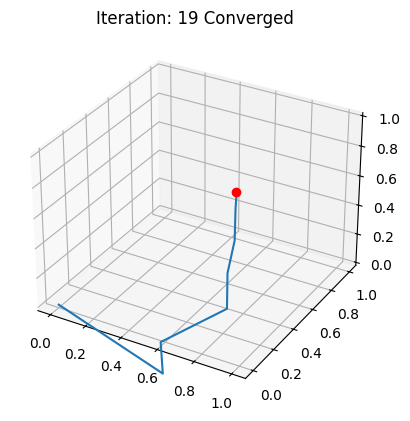

In [12]:
theta,alpha,err, it, c = PSO.PSO(link, target, pop_size, max_iter, w, c_soc, c_cog, alpha_values, constraints_theta, type='reflect')
display.Display_animated(link,theta, alpha, target, 'constr_reflect')

Same constrained problem but with 'damping" boundary condition.

MovieWriter ffmpeg unavailable; using Pillow instead.


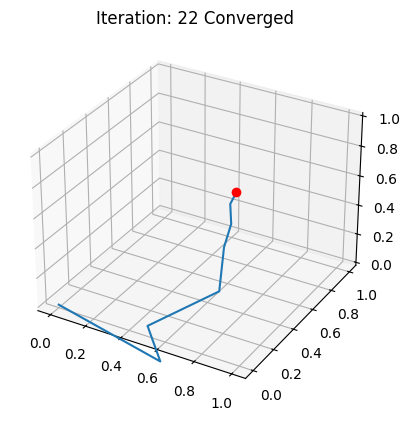

In [14]:
theta,alpha,err, it, c = PSO.PSO(link, target, pop_size, max_iter, w, c_soc, c_cog, alpha_values, constraints_theta, type='damping')
display.Display_animated(link,theta, alpha, target, 'constr_damp')

Let's see the differences between different type of boundary conditions.

In [3]:
n_it=100
count_abs=[0,0,0]
err_abs=np.zeros(n_it)
it_abs=np.zeros(n_it)
for i in range(n_it):
    _,_,err_abs[i], it_abs[i], c = PSO.PSO(link, target, pop_size, max_iter, w, c_soc, c_cog, alpha_values, constraints_theta, type='absorb')
    count_abs+=c
count_refl=[0,0,0]
err_refl=np.zeros(n_it)
it_refl=np.zeros(n_it)
for i in range(n_it):
    _,_,err_refl[i], it_refl[i], c = PSO.PSO(link, target, pop_size, max_iter, w, c_soc, c_cog, alpha_values, constraints_theta, type='reflect')
    count_refl+=c
count_damp=[0,0,0]
err_damp=np.zeros(n_it)
it_damp=np.zeros(n_it)
for i in range(n_it):
    _,_,err_damp[i], it_damp[i], c = PSO.PSO(link, target, pop_size, max_iter, w, c_soc, c_cog, alpha_values, constraints_theta, type='damping')
    count_damp+=c

In [5]:
print(f'count_absorb={count_abs}')
print(f'count_reflect={count_refl}')
print(f'count_damping={count_damp}')

count_absorb=[84  0 16]
count_reflect=[92  0  8]
count_damping=[87  0 13]


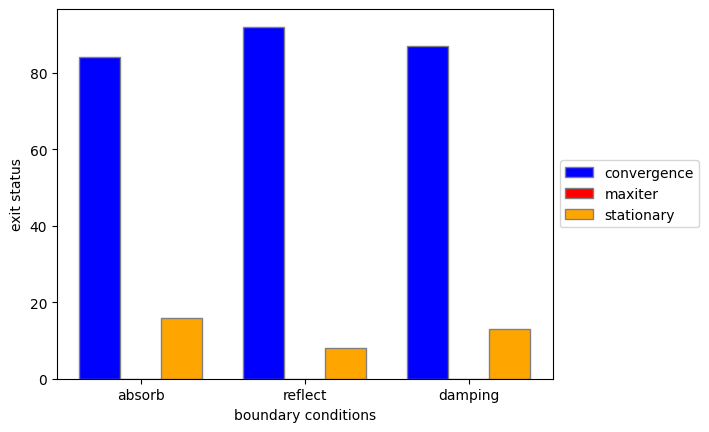

In [7]:
#make an histogram with the counts
fig, ax = plt.subplots()
barWidth = 0.25
bars1 = [count_abs[0], count_refl[0], count_damp[0]]
bars2 = [count_abs[1], count_refl[1], count_damp[1]]
bars3 = [count_abs[2], count_refl[2], count_damp[2]]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
ax.bar(r1, bars1, color='b', width=barWidth, edgecolor='grey', label='convergence')
ax.bar(r2, bars2, color='r', width=barWidth, edgecolor='grey', label='maxiter')
ax.bar(r3, bars3, color='orange', width=barWidth, edgecolor='grey', label='stationary')
ax.set_xlabel('boundary conditions')
ax.set_ylabel('exit status')
ax.set_xticks([r + barWidth for r in range(len(bars1))])
ax.set_xticklabels(['absorb', 'reflect', 'damping'])    
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [11]:
#print mean and std of the errors
print(f'absorb mean error={np.mean(err_abs)}')
print(f'absorb std error={np.std(err_abs)}')
print(f'reflect mean error={np.mean(err_refl)}')
print(f'reflect std error={np.std(err_refl)}')
print(f'damping mean error={np.mean(err_damp)}')
print(f'damping std error={np.std(err_damp)}')

#print mean and std of the iterations
print(f'absorb mean iterations={np.mean(it_abs)}')
print(f'absorb std iterations={np.std(it_abs)}')
print(f'reflect mean iterations={np.mean(it_refl)}')
print(f'reflect std iterations={np.std(it_refl)}')
print(f'damping mean iterations={np.mean(it_damp)}')
print(f'damping std iterations={np.std(it_damp)}')



absorb mean error=0.028406163321152714
absorb std error=0.08441579276470473
reflect mean error=0.0072772744250183255
reflect std error=0.022188310496209923
damping mean error=0.01649221331481723
damping std error=0.06529195225551977
absorb mean iterations=42.82
absorb std iterations=74.36953408486569
reflect mean iterations=31.15
reflect std iterations=38.11440016581659
damping mean iterations=40.56
damping std iterations=67.238132038301


# Hyperparameter inspection

Let's see now how the results may change by changing some hyperparameters values.

## Example 1

The problem is the same as the unconstrained 4 link arm presented above. The hypersparameters inspection starts by varying the values of the intertia weights betwen some values in range 0-0.9.

In [2]:
link=[2,1,3,2]
target=[2,3,4]
c_soc=1.49445
c_cog=1.49445
pop_size=100
max_iter=5000

In [19]:
w_values= [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
n_it=100
mean_it=np.zeros(len(w_values))
mean_err=np.zeros(len(w_values))
std_it=np.zeros(len(w_values))
std_err=np.zeros(len(w_values))

#count[0]=number of times the algorithm converged
#count[1]=number of times the algorithm reached the maximum number of iterations
#count[2]=number of times the algorithm reached a stationary point

for j,w in enumerate(w_values):
    it=np.zeros(n_it)
    err=np.zeros(n_it)
    count=np.array([0,0,0])
    for i in range(n_it):
        _,_,err[i], it[i], c = PSO.PSO(link, target, pop_size, max_iter, w, c_soc, c_cog)
        count+=c
    print(f'{w}, {count[0]}, {count[1]}, {count[2]}')
    mean_it[j]=np.mean(it)
    std_it[j]=np.std(it)
    mean_err[j]=np.mean(err)
    std_err[j]=np.std(err)

0.0, 57, 0, 43
0.1, 92, 0, 8
0.2, 100, 0, 0
0.3, 100, 0, 0
0.4, 100, 0, 0
0.5, 100, 0, 0
0.6, 100, 0, 0
0.7, 100, 0, 0
0.8, 100, 0, 0
0.9, 100, 0, 0


For small values of w the the algorithm may reach stationary point.

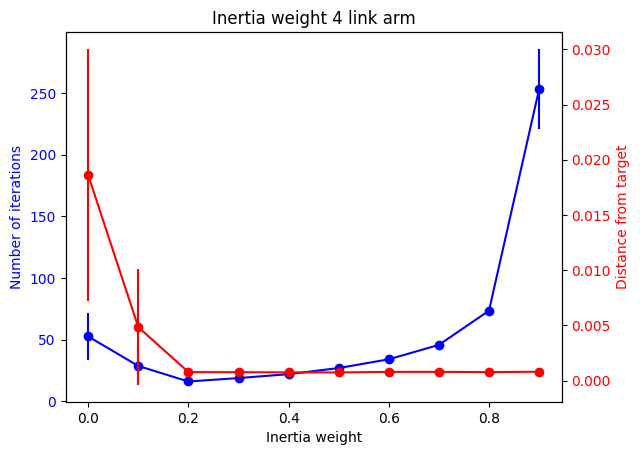

In [20]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Inertia weight')
ax1.set_ylabel('Number of iterations', color='b')
ax1.errorbar(w_values, mean_it, yerr=std_it*1.96/(np.sqrt(n_it)), fmt='o-', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.set_ylabel('Distance from target', color='r')
ax2.errorbar(w_values, mean_err, yerr=std_err*1.96/np.sqrt(n_it), fmt='o-', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Inertia weight 4 link arm')
plt.savefig('hyperpars_plot/w_values1.png')
plt.show()

In [3]:
w_best=0.2

By fixing inertia weight as the best found before, let's vary the social factor value.

In [24]:
c_soc_values=[0.5,1.0,1.5,2.0,2.5,3.0]
max_iter=500
n_it=100
mean_it=np.zeros(len(c_soc_values))
mean_err=np.zeros(len(c_soc_values))
std_it=np.zeros(len(c_soc_values))
std_err=np.zeros(len(c_soc_values))
#count[0]=number of times the algorithm converged
#count[1]=number of times the algorithm reached the maximum number of iterations
#count[2]=number of times the algorithm reached a stationary point
for j,c_soc in enumerate(c_soc_values):
    it=np.zeros(n_it)
    err=np.zeros(n_it)
    count=np.array([0,0,0])
    for i in range(n_it):
        _,_,err[i], it[i], c = PSO.PSO(link, target, pop_size, max_iter, w_best, c_soc, c_cog)
        count+=c
    print(f'{c_soc}, {count[0]}, {count[1]}, {count[2]}')
    mean_it[j]=np.mean(it)
    std_it[j]=np.std(it)
    mean_err[j]=np.mean(err)
    std_err[j]=np.std(err)

0.5, 15, 85, 0
1.0, 85, 3, 12
1.5, 100, 0, 0
2.0, 100, 0, 0
2.5, 100, 0, 0
3.0, 100, 0, 0


For small values of c_soc the algorithm is not able to find the best for more than a half of values. It's confirmed that a good value for c_soc might be around 1.5

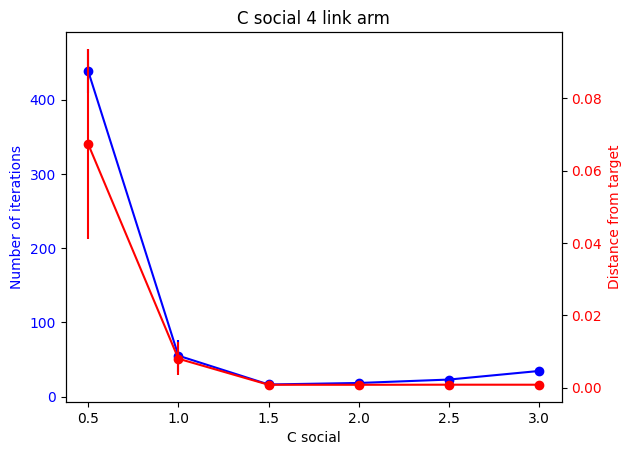

In [26]:
#plot the results
fig, ax1 = plt.subplots()
ax1.set_xlabel('C social')
ax1.set_ylabel('Number of iterations', color='b')
ax1.errorbar(c_soc_values, mean_it, yerr=std_it*1.96/(np.sqrt(n_it)), fmt='o-', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.set_ylabel('Distance from target', color='r')
ax2.errorbar(c_soc_values, mean_err, yerr=std_err*1.96/np.sqrt(n_it), fmt='o-', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('C social 4 link arm')
plt.savefig('csoc_values1.png')
plt.show()

In [27]:
c_soc_best=1.49445

Let's fix now social factor and inertia weight and inspect cognitive factor.

In [28]:
c_cog_values=[0.5,1.0,1.5,2.0,2.5,3.0]
max_iter=500
n_it=100
mean_it=np.zeros(len(c_cog_values))
mean_err=np.zeros(len(c_cog_values))
std_it=np.zeros(len(c_cog_values))
std_err=np.zeros(len(c_cog_values))
#count[0]=number of times the algorithm converged
#count[1]=number of times the algorithm reached the maximum number of iterations
#count[2]=number of times the algorithm reached a stationary point
for j,c_cog in enumerate(c_cog_values):
    it=np.zeros(n_it)
    err=np.zeros(n_it)
    count=np.array([0,0,0])
    for i in range(n_it):
        _,_,err[i], it[i], c = PSO.PSO(link, target, pop_size, max_iter, w_best, c_soc_best, c_cog)
        count+=c
    print(f'{c_cog}, {count[0]}, {count[1]}, {count[2]}')
    mean_it[j]=np.mean(it)
    std_it[j]=np.std(it)
    mean_err[j]=np.mean(err)
    std_err[j]=np.std(err)

0.5, 99, 0, 1
1.0, 99, 0, 1
1.5, 100, 0, 0
2.0, 99, 0, 1
2.5, 99, 0, 1
3.0, 100, 0, 0


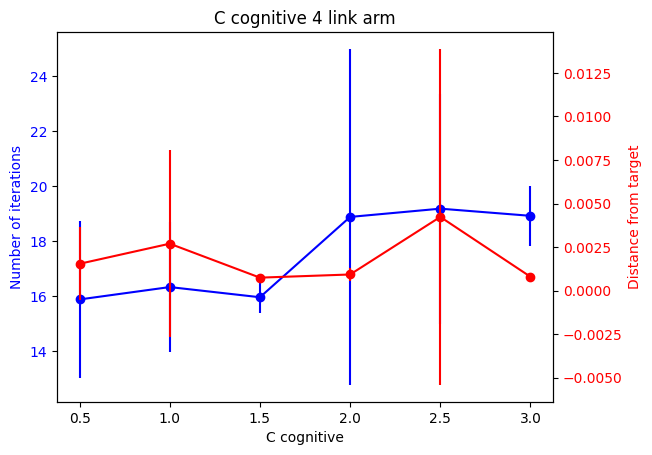

In [29]:
#plot the results
fig, ax1 = plt.subplots()
ax1.set_xlabel('C cognitive')
ax1.set_ylabel('Number of iterations', color='b')
ax1.errorbar(c_cog_values, mean_it, yerr=std_it*1.96/(np.sqrt(50)), fmt='o-', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.set_ylabel('Distance from target', color='r')
ax2.errorbar(c_cog_values, mean_err, yerr=std_err*1.96/np.sqrt(50), fmt='o-', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('C cognitive 4 link arm')
plt.savefig('ccog_values1.png')
plt.show()

In [30]:
c_cog_best=1.49445

To get a better intuition on how social and congnitive factor influence the result of the optimization, let's perform come iterations varying both of them.

In [4]:
c_cog=[0.5,1.0,1.5,2.0,2.5,3.0]
c_soc=[0.5,1.0,1.5,2.0,2.5,3.0]
max_iter=500
n_it=50
mean_it=np.zeros((len(c_cog),len(c_soc)))
mean_err=np.zeros((len(c_cog),len(c_soc)))
std_it=np.zeros((len(c_cog),len(c_soc)))
std_err=np.zeros((len(c_cog),len(c_soc)))
#count[0]=number of times the algorithm converged
#count[1]=number of times the algorithm reached the maximum number of iterations
#count[2]=number of times the algorithm reached a stationary point
for i,cog in enumerate(c_cog):
    for j,soc in enumerate(c_soc):
        it=np.zeros(n_it)
        err=np.zeros(n_it)
        count=np.array([0,0,0])
        for k in range(n_it):
            _,_,err[k], it[k], c = PSO.PSO(link, target, pop_size, max_iter, w_best, soc, cog)
            count+=c
        print(f'c_soc={soc}, c_cog={cog}, count={count}')
        mean_it[i,j]=np.mean(it)
        std_it[i,j]=np.std(it)
        mean_err[i,j]=np.mean(err)
        std_err[i,j]=np.std(err)

c_soc=0.5, c_cog=0.5, count=[10 38  2]
c_soc=1.0, c_cog=0.5, count=[41  0  9]
c_soc=1.5, c_cog=0.5, count=[49  0  1]
c_soc=2.0, c_cog=0.5, count=[50  0  0]
c_soc=2.5, c_cog=0.5, count=[50  0  0]
c_soc=3.0, c_cog=0.5, count=[50  0  0]
c_soc=0.5, c_cog=1.0, count=[14 36  0]
c_soc=1.0, c_cog=1.0, count=[44  1  5]
c_soc=1.5, c_cog=1.0, count=[50  0  0]
c_soc=2.0, c_cog=1.0, count=[50  0  0]
c_soc=2.5, c_cog=1.0, count=[50  0  0]
c_soc=3.0, c_cog=1.0, count=[50  0  0]
c_soc=0.5, c_cog=1.5, count=[11 39  0]
c_soc=1.0, c_cog=1.5, count=[43  1  6]
c_soc=1.5, c_cog=1.5, count=[48  0  2]
c_soc=2.0, c_cog=1.5, count=[50  0  0]
c_soc=2.5, c_cog=1.5, count=[50  0  0]
c_soc=3.0, c_cog=1.5, count=[50  0  0]
c_soc=0.5, c_cog=2.0, count=[10 40  0]
c_soc=1.0, c_cog=2.0, count=[41  0  9]
c_soc=1.5, c_cog=2.0, count=[50  0  0]
c_soc=2.0, c_cog=2.0, count=[50  0  0]
c_soc=2.5, c_cog=2.0, count=[50  0  0]
c_soc=3.0, c_cog=2.0, count=[49  1  0]
c_soc=0.5, c_cog=2.5, count=[28 22  0]
c_soc=1.0, c_cog=2.5, cou

<Figure size 3000x1000 with 0 Axes>

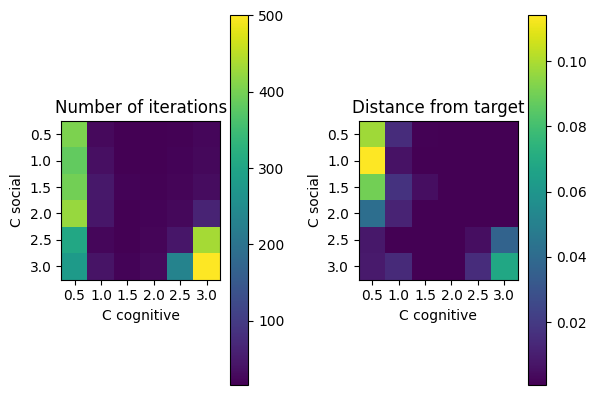

In [5]:
#set a big figure
plt.figure(figsize=(30,10))
fig, ax = plt.subplots(1,2)
X, Y = np.meshgrid(c_cog, c_soc)
im = ax[0].imshow(mean_it, cmap='viridis')
ax[0].set_xticks(np.arange(len(c_cog)))
ax[0].set_yticks(np.arange(len(c_soc)))
ax[0].set_xticklabels(c_cog)
ax[0].set_yticklabels(c_soc)
ax[0].set_xlabel('C cognitive')
ax[0].set_ylabel('C social')

#put some space between images
plt.subplots_adjust(wspace=0.5)

ax[0].set_title('Number of iterations')
fig.colorbar(im, ax=ax[0])
im = ax[1].imshow(mean_err, cmap='viridis')
ax[1].set_xticks(np.arange(len(c_cog)))
ax[1].set_yticks(np.arange(len(c_soc)))
ax[1].set_xticklabels(c_cog)
ax[1].set_yticklabels(c_soc)
ax[1].set_xlabel('C cognitive')
ax[1].set_ylabel('C social')

ax[1].set_title('Distance from target')
fig.colorbar(im, ax=ax[1])
plt.savefig('ccog_csoc_values1.png')
plt.show()

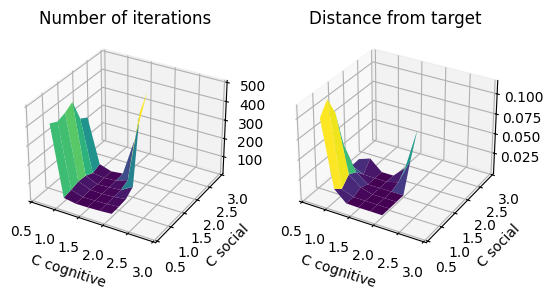

In [6]:
fig, ax = plt.subplots(1, 2, subplot_kw={'projection': '3d'})

X, Y = np.meshgrid(c_cog, c_soc)

# First subplot
im = ax[0].plot_surface(X, Y, mean_it, cmap='viridis')
ax[0].set_xticks(np.arange(len(c_cog)))
ax[0].set_yticks(np.arange(len(c_soc)))
ax[0].set_xticklabels(c_cog)
ax[0].set_yticklabels(c_soc)
ax[0].set_xlabel('C cognitive')
ax[0].set_ylabel('C social')
ax[0].set_title('Number of iterations')

# Second subplot
im = ax[1].plot_surface(X, Y, mean_err, cmap='viridis')
ax[1].set_xticks(np.arange(len(c_cog)))
ax[1].set_yticks(np.arange(len(c_soc)))
ax[1].set_xticklabels(c_cog)
ax[1].set_yticklabels(c_soc)
ax[1].set_xlabel('C cognitive')
ax[1].set_ylabel('C social')
ax[1].set_title('Distance from target')

plt.show()

## Example 2 (constrained)

The same analysis has been conducted for the second example with constraints.

In [7]:
link=[0.5,0.2,0.25,0.3,0.2,0.2,0.1]
target=[0.7,0.5,0.7]
c_soc=1.49445
c_cog=1.49445
w=0.5
pop_size=100
max_iter=5000
alpha_values=[-np.pi/2,np.pi/2,-np.pi/2,np.pi/2,-np.pi/2,0,0]
constraints_theta=[[-np.pi,np.pi],[-np.pi/2,np.pi/6],[-np.pi/2,2*np.pi/3],[-np.pi,np.pi],[-np.pi,np.pi],[-np.pi,np.pi],[-np.pi/6,np.pi/2]]

In [32]:
w_values= [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
n_it=100
mean_it=np.zeros(len(w_values))
mean_err=np.zeros(len(w_values))
std_it=np.zeros(len(w_values))
std_err=np.zeros(len(w_values))
#count[0]=number of times the algorithm converged
#count[1]=number of times the algorithm reached the maximum number of iterations
#count[2]=number of times the algorithm reached a stationary point
for j,w in enumerate(w_values):
    it=np.zeros(n_it)
    err=np.zeros(n_it)
    count=np.array([0,0,0])
    for i in range(n_it):
        _,_,err[i], it[i], c = PSO.PSO(link, target, pop_size, max_iter, w, c_soc, c_cog, alpha_values, constraints_theta, type='absorb')
        count+=c
    print(f'{w}, {count[0]}, {count[1]}, {count[2]}')
    mean_it[j]=np.mean(it)
    std_it[j]=np.std(it)
    mean_err[j]=np.mean(err)
    std_err[j]=np.std(err)

0.0, 20, 0, 80
0.1, 44, 0, 56
0.2, 70, 0, 30
0.3, 82, 0, 18
0.4, 86, 0, 14
0.5, 82, 0, 18
0.6, 86, 0, 14
0.7, 87, 0, 13
0.8, 90, 0, 10
0.9, 87, 13, 0


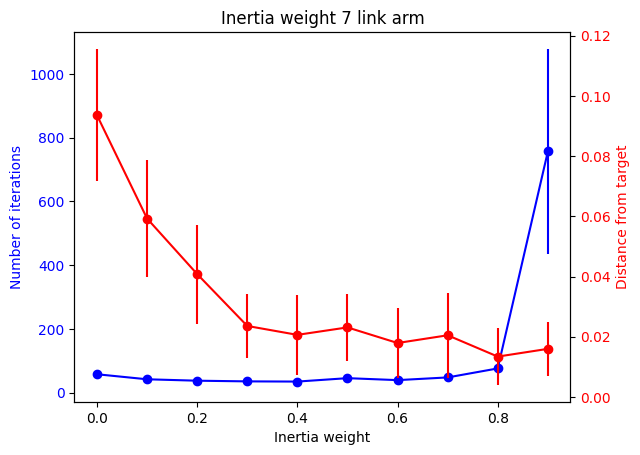

In [33]:
# plot the results
fig, ax1 = plt.subplots()
ax1.set_xlabel('Inertia weight')
ax1.set_ylabel('Number of iterations', color='b')
ax1.errorbar(w_values, mean_it, yerr=std_it*1.96/(np.sqrt(n_it)), fmt='o-', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.set_ylabel('Distance from target', color='r')
ax2.errorbar(w_values, mean_err, yerr=std_err*1.96/np.sqrt(n_it), fmt='o-', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Inertia weight 7 link arm')
plt.savefig('w_values2.png')
plt.show()

In [8]:
w_best=0.8

In [9]:
#let's try to vary both c_soc and c_cog
c_cog=[0.5,1.0,1.5,2.0,2.5,3.0]
c_soc=[0.5,1.0,1.5,2.0,2.5,3.0]
max_iter=500
n_it=50
mean_it=np.zeros((len(c_cog),len(c_soc)))
mean_err=np.zeros((len(c_cog),len(c_soc)))
std_it=np.zeros((len(c_cog),len(c_soc)))
std_err=np.zeros((len(c_cog),len(c_soc)))
#count[0]=number of times the algorithm converged
#count[1]=number of times the algorithm reached the maximum number of iterations
#count[2]=number of times the algorithm reached a stationary point
for i,cog in enumerate(c_cog):
    for j,soc in enumerate(c_soc):
        it=np.zeros(n_it)
        err=np.zeros(n_it)
        count=np.array([0,0,0])
        for k in range(n_it):
            _,_,err[k], it[k], c = PSO.PSO(link, target, pop_size, max_iter, w_best, soc, cog, alpha_values, constraints_theta, type='absorb')
            count+=c
        print(f'c_soc={soc}, c_cog={cog}, count={count}')
        mean_it[i,j]=np.mean(it)
        std_it[i,j]=np.std(it)
        mean_err[i,j]=np.mean(err)
        std_err[i,j]=np.std(err)

c_soc=0.5, c_cog=0.5, count=[45  0  5]
c_soc=1.0, c_cog=0.5, count=[45  0  5]
c_soc=1.5, c_cog=0.5, count=[42  0  8]
c_soc=2.0, c_cog=0.5, count=[42  1  7]
c_soc=2.5, c_cog=0.5, count=[48  2  0]
c_soc=3.0, c_cog=0.5, count=[41  9  0]
c_soc=0.5, c_cog=1.0, count=[48  0  2]
c_soc=1.0, c_cog=1.0, count=[46  0  4]
c_soc=1.5, c_cog=1.0, count=[40  0 10]
c_soc=2.0, c_cog=1.0, count=[47  2  1]
c_soc=2.5, c_cog=1.0, count=[46  4  0]
c_soc=3.0, c_cog=1.0, count=[44  6  0]
c_soc=0.5, c_cog=1.5, count=[45  0  5]
c_soc=1.0, c_cog=1.5, count=[46  0  4]
c_soc=1.5, c_cog=1.5, count=[43  1  6]
c_soc=2.0, c_cog=1.5, count=[43  7  0]
c_soc=2.5, c_cog=1.5, count=[44  6  0]
c_soc=3.0, c_cog=1.5, count=[41  9  0]
c_soc=0.5, c_cog=2.0, count=[48  0  2]
c_soc=1.0, c_cog=2.0, count=[46  1  3]
c_soc=1.5, c_cog=2.0, count=[43  7  0]
c_soc=2.0, c_cog=2.0, count=[45  5  0]
c_soc=2.5, c_cog=2.0, count=[47  3  0]
c_soc=3.0, c_cog=2.0, count=[13 37  0]
c_soc=0.5, c_cog=2.5, count=[49  1  0]
c_soc=1.0, c_cog=2.5, cou

<Figure size 3000x1000 with 0 Axes>

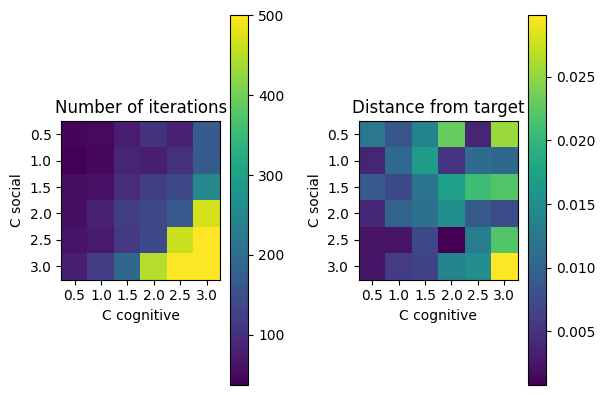

In [10]:
#set a big figure
plt.figure(figsize=(30,10))
fig, ax = plt.subplots(1,2)
X, Y = np.meshgrid(c_cog, c_soc)
im = ax[0].imshow(mean_it, cmap='viridis')
ax[0].set_xticks(np.arange(len(c_cog)))
ax[0].set_yticks(np.arange(len(c_soc)))
ax[0].set_xticklabels(c_cog)
ax[0].set_yticklabels(c_soc)
ax[0].set_xlabel('C cognitive')
ax[0].set_ylabel('C social')

#put some space between images
plt.subplots_adjust(wspace=0.5)

ax[0].set_title('Number of iterations')
fig.colorbar(im, ax=ax[0])
im = ax[1].imshow(mean_err, cmap='viridis')
ax[1].set_xticks(np.arange(len(c_cog)))
ax[1].set_yticks(np.arange(len(c_soc)))
ax[1].set_xticklabels(c_cog)
ax[1].set_yticklabels(c_soc)
ax[1].set_xlabel('C cognitive')
ax[1].set_ylabel('C social')

ax[1].set_title('Distance from target')
fig.colorbar(im, ax=ax[1])
plt.savefig('ccog_csoc_values2.png')
plt.show()

In [11]:
c_soc_values=[0.5,1.0,1.5,2.0,2.5,3.0]
c_cog=1.49445
max_iter=500
n_it=100
mean_it=np.zeros(len(c_soc_values))
mean_err=np.zeros(len(c_soc_values))
std_it=np.zeros(len(c_soc_values))
std_err=np.zeros(len(c_soc_values))
#count[0]=number of times the algorithm converged
#count[1]=number of times the algorithm reached the maximum number of iterations
#count[2]=number of times the algorithm reached a stationary point
for j,c_soc in enumerate(c_soc_values):
    it=np.zeros(n_it)
    err=np.zeros(n_it)
    count=np.array([0,0,0])
    for i in range(n_it):
        _,_,err[i], it[i], c = PSO.PSO(link, target, pop_size, max_iter, w_best, c_soc, c_cog, alpha_values, constraints_theta, type='absorb')
        count+=c
    print(f'{c_soc}, {count[0]}, {count[1]}, {count[2]}')
    mean_it[j]=np.mean(it)
    std_it[j]=np.std(it)
    mean_err[j]=np.mean(err)
    std_err[j]=np.std(err)

0.5, 93, 2, 5
1.0, 95, 0, 5
1.5, 90, 1, 9
2.0, 87, 13, 0
2.5, 90, 10, 0
3.0, 84, 16, 0


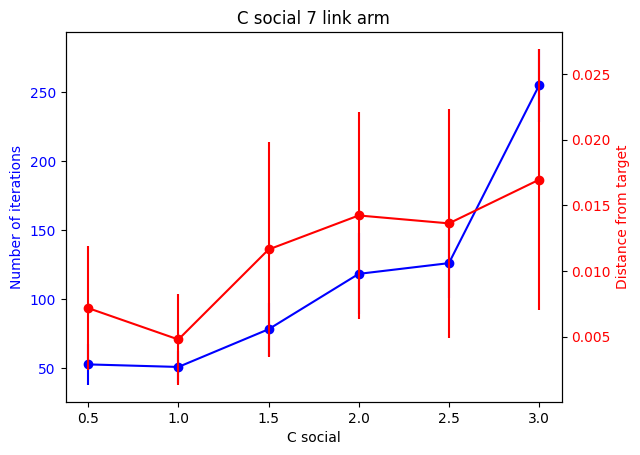

In [12]:
#plot the results
fig, ax1 = plt.subplots()
ax1.set_xlabel('C social')
ax1.set_ylabel('Number of iterations', color='b')
ax1.errorbar(c_soc_values, mean_it, yerr=std_it*1.96/(np.sqrt(n_it)), fmt='o-', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.set_ylabel('Distance from target', color='r')
ax2.errorbar(c_soc_values, mean_err, yerr=std_err*1.96/np.sqrt(n_it), fmt='o-', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('C social 7 link arm')
plt.savefig('csoc_values2.png')
plt.show()

In [13]:
c_soc_best=1.0

In [14]:
c_cog_values=[0.5,1.0,1.5,2.0,2.5,3.0]
max_iter=500
n_it=100
mean_it=np.zeros(len(c_cog_values))
mean_err=np.zeros(len(c_cog_values))
std_it=np.zeros(len(c_cog_values))
std_err=np.zeros(len(c_cog_values))
#count[0]=number of times the algorithm converged
#count[1]=number of times the algorithm reached the maximum number of iterations
#count[2]=number of times the algorithm reached a stationary point
for j,c_cog in enumerate(c_cog_values):
    it=np.zeros(n_it)
    err=np.zeros(n_it)
    count=np.array([0,0,0])
    for i in range(n_it):
        _,_,err[i], it[i], c = PSO.PSO(link, target, pop_size, max_iter, w, c_soc_best, c_cog, alpha_values, constraints_theta, type='absorb')
        count+=c
    print(f'{c_soc}, {count[0]}, {count[1]}, {count[2]}')
    mean_it[j]=np.mean(it)
    std_it[j]=np.std(it)
    mean_err[j]=np.mean(err)
    std_err[j]=np.std(err)

3.0, 84, 0, 16
3.0, 88, 0, 12
3.0, 90, 0, 10
3.0, 94, 0, 6
3.0, 80, 0, 20
3.0, 90, 0, 10


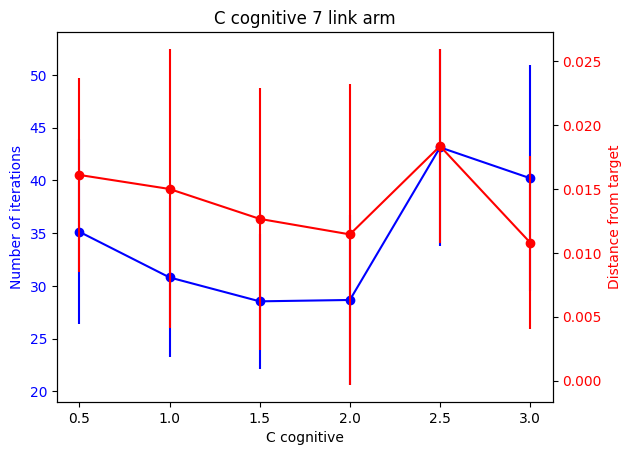

In [15]:
#plot the results
fig, ax1 = plt.subplots()
ax1.set_xlabel('C cognitive')
ax1.set_ylabel('Number of iterations', color='b')
ax1.errorbar(c_soc_values, mean_it, yerr=std_it*1.96/(np.sqrt(n_it)), fmt='o-', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.set_ylabel('Distance from target', color='r')
ax2.errorbar(c_soc_values, mean_err, yerr=std_err*1.96/np.sqrt(n_it), fmt='o-', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('C cognitive 7 link arm')
plt.savefig('ccog_values2.png')
plt.show()

In [16]:
c_cog_best=2.0